# Visualization with Python


# `matplotlib`

In [1]:
import pandas as pd

## equivalent to %pylab inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

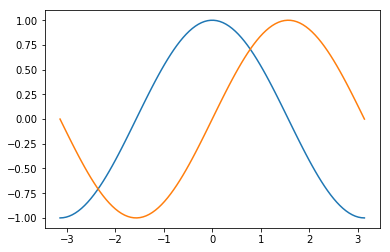

In [2]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S);

#plt.show()

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


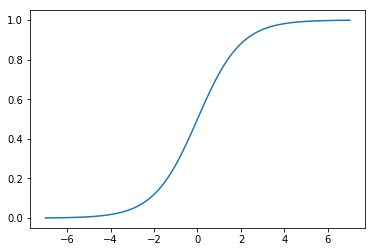

In [3]:
n = 100

X = np.linspace(-7, 7, n)
Y = np.e ** X / (1 + np.e ** X)

plt.plot(X, Y)
plt.show()

### Scatter plots

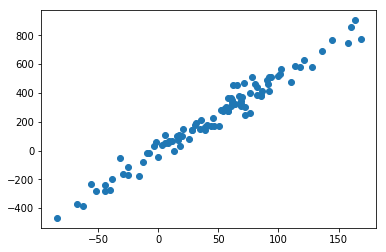

In [4]:
true_theta_0 = 2
true_theta_1 = 5

X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
Y = true_theta_0 + true_theta_1 * X
Y_randomized = Y + jitter

plt.scatter(X, Y_randomized)
plt.show()

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


In [5]:
def generate_points(true_theta_0 = 2, true_theta_1 = 5):

    X = (np.random.randn(100) + 1) * 50
    jitter = 50 * np.random.randn(100)
    Y = true_theta_0 + true_theta_1 * X
    Y_randomized = Y + jitter

    return X, Y_randomized

This is what happens if you make a line plot of unsorted data:

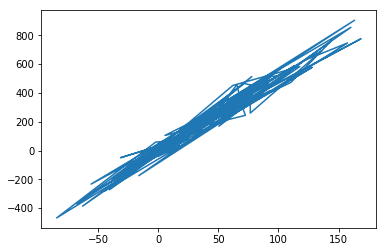

In [6]:
plt.plot(X,Y_randomized)

### Bar plots

Do not confuse with histograms

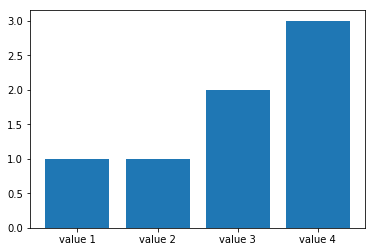

In [7]:
X=[1,1,2,3]
Y=["value 1","value 2","value 3","value 4"]

plt.bar(range(len(X)), X)
plt.xticks(np.arange(len(X)), Y)
plt.show()

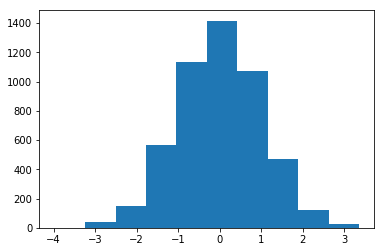

In [8]:
X_normal = np.random.normal(size=5000)
plt.hist(X_normal);

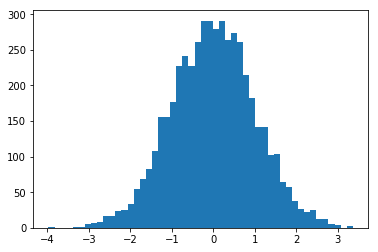

In [9]:
plt.hist(X_normal, bins=50);

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

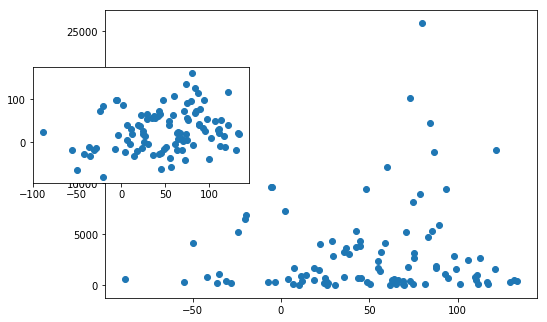

In [10]:
X, Y = generate_points(20, 0.2)

figure = plt.figure(figsize=(10,8))
axes = figure.add_axes([0.2,0.4,0.6,0.5])
axes.scatter(X, Y ** 2)

axes2 = figure.add_axes([0.1,0.6,0.3,0.2])
axes2.scatter(X, Y)

plt.show()

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

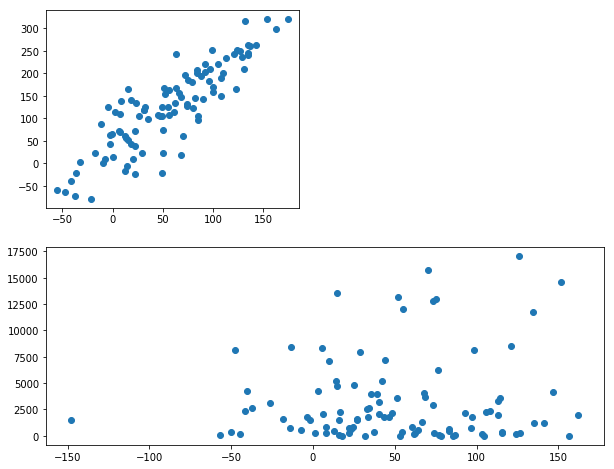

In [11]:
X1, Y1 = generate_points(50, 1.5)
X2, Y2 = generate_points(20, 0.2)
Y2_square = Y2 ** 2

figure = plt.figure(figsize=(10,8))

subplot_1 = figure.add_subplot(2,2,1)
subplot_1.scatter(X1, Y1)

subplot_2 = figure.add_subplot(2,1,2)
subplot_2.scatter(X2, Y2_square)

plt.show()

### `figure.subplots()`

<class 'numpy.ndarray'> (2, 2)


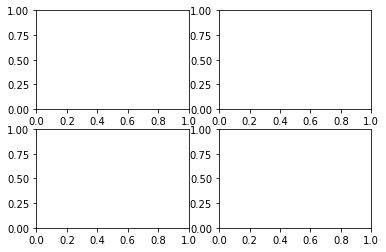

In [12]:
figure, axes = plt.subplots(2,2)
print(type(axes), axes.shape)

In [13]:
axes.shape

(2, 2)

In [14]:
type(figure)

matplotlib.figure.Figure

In [15]:
ax_ = axes[0,0]
ax_

In [16]:
figure.dpi

72.0

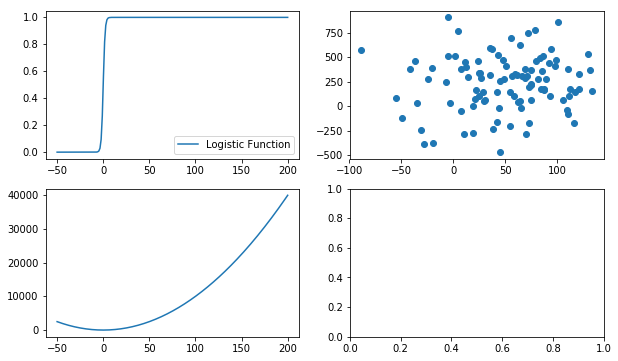

In [17]:
figure, axeses = plt.subplots(2,2)

X_2 = np.linspace(-50, 200, 200)
Y_2 = 1 / (1 + np.exp(-X_2))

axeses[0,0].plot(X_2, Y_2)
axeses[0,1].scatter(X, Y_randomized)
#     axeses[0,1].plot(X2, Y2, c='blue')
axeses[1,0].plot(X_2, X_2 ** 2)
#        axeses[1,1].plot(X2, X2)

figure.set_size_inches(10,6)
axeses[0,0].legend(['Logistic Function']);

### Sharing axis

/home/santos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


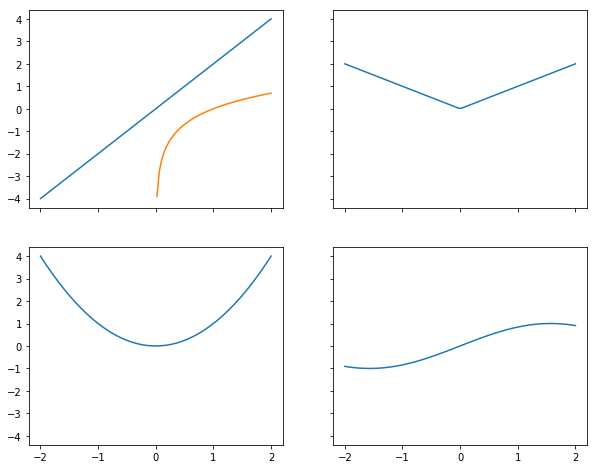

In [18]:
X = np.linspace(-2, 2, 100)

figure, axes_array = plt.subplots(2,2, sharex=True, sharey=True)
figure.set_size_inches(10,8)

# Linear and Log
axes_array[0,0].plot(X, 2*X)
axes_array[0,0].plot(X, np.log(X))

# Abs
axes_array[0,1].plot(X, np.abs(X))

# Square
axes_array[1,0].plot(X, X ** 2)

# Sin
axes_array[1,1].plot(X, np.sin(X))

plt.show()

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

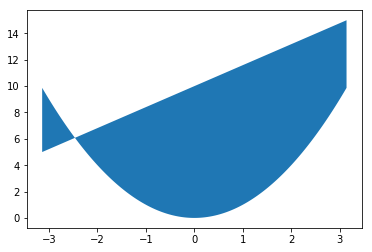

In [19]:
n=256
X = np.linspace(-np.pi,np.pi,n)

Y1 = np.linspace(5,15,n)
Y2 = X ** 2

plt.fill_between(X, Y1, X ** 2)

plt.show()

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

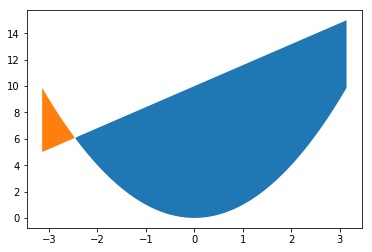

In [20]:
n=256
X = np.linspace(-np.pi,np.pi,n)

Y1 = np.linspace(5,15,n)
Y2 = X ** 2

plt.fill_between(X, Y1, X ** 2, where=Y1 > Y2)
plt.fill_between(X, Y1, X ** 2, where=Y1 < Y2)

plt.show()

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



https://matplotlib.org/gallery/index.html

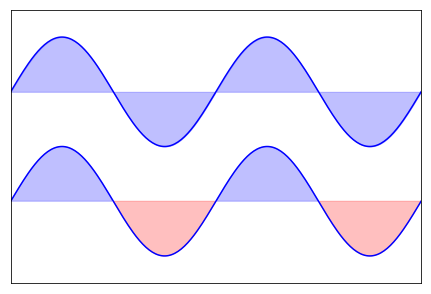

In [21]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.axes([0.025,0.025,0.95,0.95])

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y-1, (Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, (Y-1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi,np.pi), plt.xticks([])
plt.ylim(-2.5,2.5), plt.yticks([])

plt.show()

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

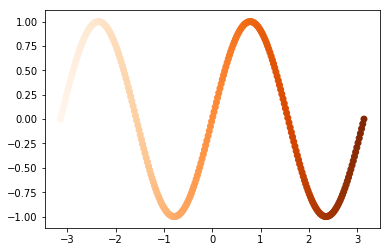

In [22]:
from matplotlib import cm

cmap = cm.get_cmap('Oranges')
plt.scatter(X,Y, c=X, cmap=cmap)

In [23]:
cmap_ = cm.get_cmap('Oranges')

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

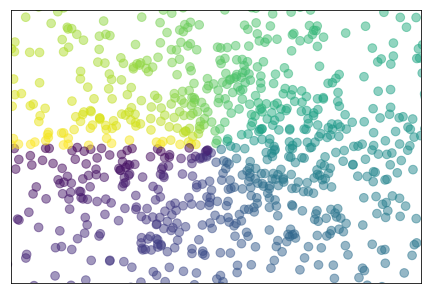

In [24]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])

plt.show()

### Markers and linestyles

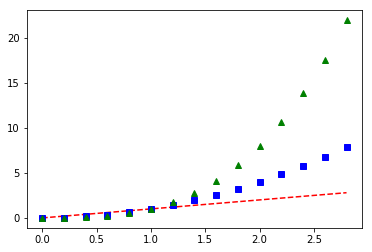

In [25]:
figure, axes = plt.subplots(1,1)


X = np.arange(0, 3, .2)
Y1 = X
Y2 = X ** 2
Y3 = X ** 3

axes.plot(X, Y1, 'r--')
axes.plot(X, Y2, 'bs')
axes.plot(X, Y3, 'g^')

plt.show()

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

/home/santos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


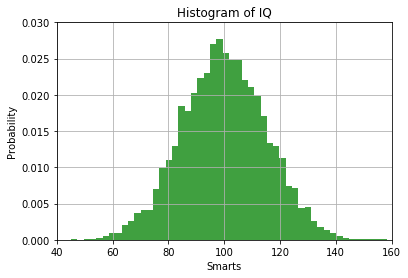

In [26]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



Esto es una fórmula:
$$f(x,a) = \frac{x^{2a}}{3}$$

Esto es una expresión inline $\sqrt{3}$.

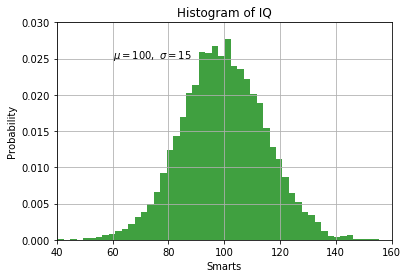

In [28]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Legends

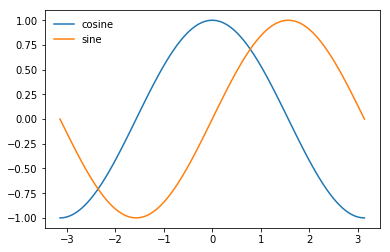

In [29]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C, label='cosine')
plt.plot(X,S, label='sine')

plt.legend(loc='best', frameon=False)

plt.show()

### Estilos

In [30]:
plt.style.available

['fast',
 'seaborn-dark',
 'seaborn-muted',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'tableau-colorblind10',
 'seaborn-deep',
 'dark_background',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-white',
 'seaborn-poster',
 'bmh',
 'fivethirtyeight',
 'classic',
 'ggplot',
 '_classic_test',
 'seaborn',
 'seaborn-pastel',
 'seaborn-talk',
 'seaborn-paper']

In [31]:
plt.style.use("ggplot")

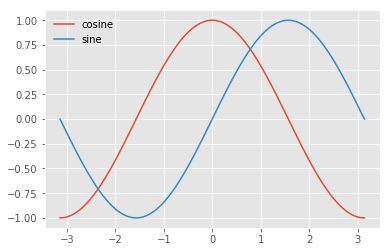

In [32]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C, label='cosine')
plt.plot(X,S, label='sine')

plt.legend(loc='best', frameon=False)

plt.show()

In [33]:
plt.style.use('seaborn-dark')

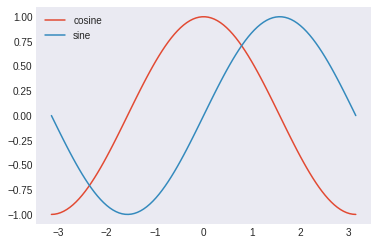

In [34]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C, label='cosine')
plt.plot(X,S, label='sine')

plt.legend(loc='best', frameon=False)

plt.show()

### Estilos

In [35]:
import matplotlib as mp

In [36]:
mp.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [33]:
plt.style.use({"axes.linewidth":12})

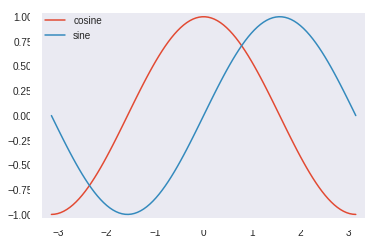

In [34]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C, label='cosine')
plt.plot(X,S, label='sine')

plt.legend(loc='best', frameon=False)

plt.show()

## Ticks, tick labels, limits

### Ticks

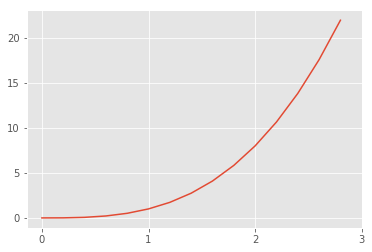

In [22]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))

plt.show()

### Tick labels

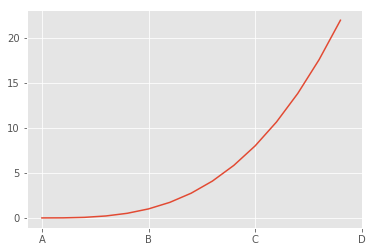

In [23]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))
axes.set_xticklabels(list('ABCD'))

plt.show()

### Limits

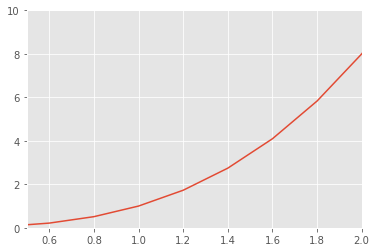

In [24]:
plt.plot(X, Y)

axes = plt.gca()
axes.set_xlim((0.5,2))
axes.set_ylim((0,10))

plt.show()

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [7]:
!pwd

/home/dsc/Data/opentraveldata/python_class/PYTHON/2


In [12]:
import pandas as pd

#matplotlib inline

path='../../../../houses.csv'

In [29]:
short_column_names=['local_prices','bathrroms','site_area','living_area','garage','rooms','bedrooms','age','construction type','archicture','fireplaces','price']

df=pd.read_csv(path,index_col=0)
df.columns=short_column_names
df.head()

local_prices  bathrroms  site_area  living_area  garage  rooms  \
index                                                                   
1            4.9176        1.0      3.472        0.998     1.0      7   
2            5.0208        1.0      3.531        1.500     2.0      7   
3            4.5429        1.0      2.275        1.175     1.0      6   
4            4.5573        1.0      4.050        1.232     1.0      6   
5            5.0597        1.0      4.455        1.121     1.0      6   

       bedrooms  age  construction type  archicture  fireplaces  price  
index                                                                   
1             4   42                  3           1           0   25.9  
2             4   62                  1           1           0   29.5  
3             3   40                  2           1           0   27.9  
4             3   54                  4           1           0   25.9  
5             3   42                  3           1           0   29.9

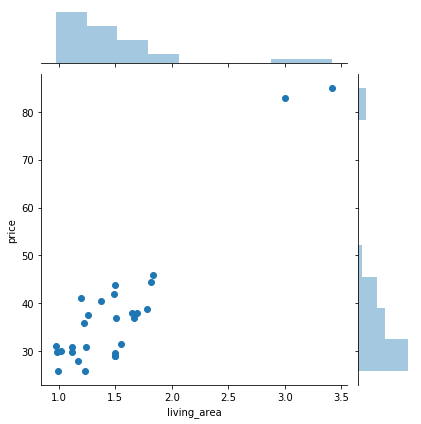

In [30]:
import seaborn as sns

sns.jointplot(data=df,x='living_area', y='price')

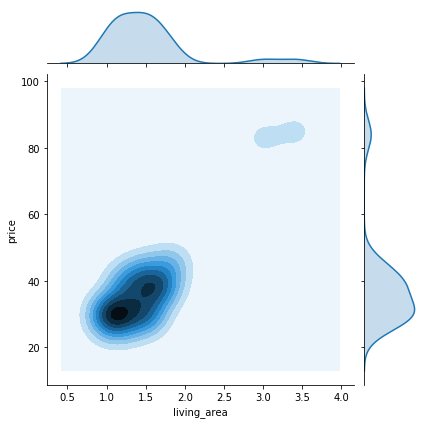

In [31]:
sns.jointplot(data=df,x='living_area', y='price', kind='kde')

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

### Histogram

(array([ 3.,  4.,  4., 15., 21., 21., 15.,  8.,  8.,  1.]),
 array([-2.32072336, -1.85497842, -1.38923348, -0.92348854, -0.45774361,
         0.00800133,  0.47374627,  0.93949121,  1.40523614,  1.87098108,
         2.33672602]),
 <a list of 10 Patch objects>)

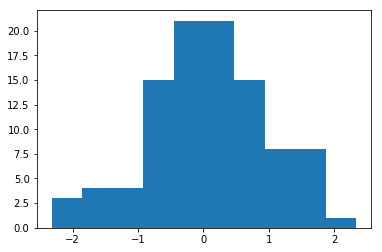

In [16]:
import numpy as np
import matplotlib.pyplot as plt

aaa=np.random.randn(100)

plt.hist(aaa)

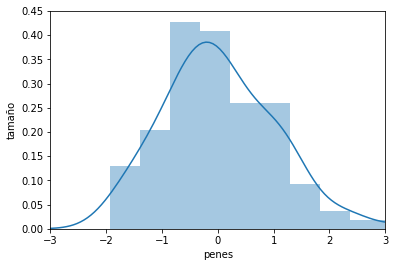

In [22]:
import numpy as np
import matplotlib.pyplot as plt

aaa=np.random.randn(100)

ax=sns.distplot(aaa)

ax.set_xlim(-3,3)

ax.set_xlabel('penes')
ax.set_ylabel('tamaño');


More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [28]:
df.columns()

TypeError: 'Index' object is not callable

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


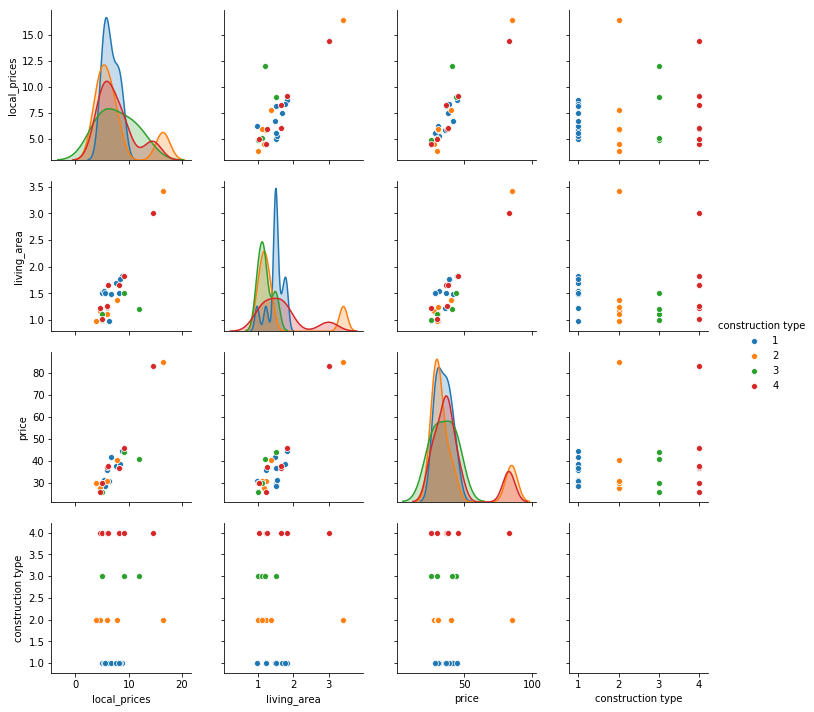

In [33]:
sns.pairplot(df[['local_prices','living_area', 'price', 'construction type']], diag_kind='kde', hue='construction type')

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

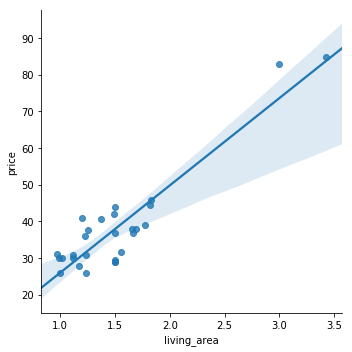

In [34]:
sns.lmplot(data=df,x='living_area', y='price')

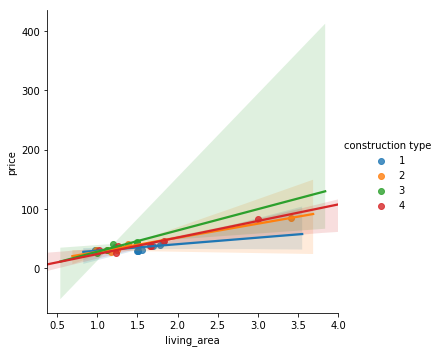

In [35]:
sns.lmplot(data=df,x='living_area', y='price', hue='construction type')

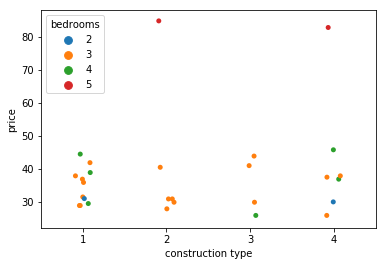

In [40]:
sns.stripplot(data=df, x='construction type', y='price', hue='bedrooms')

### Swarm plot

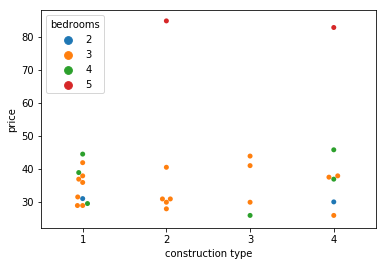

In [39]:
sns.swarmplot (data=df, x='construction type', y='price', hue='bedrooms')

### Boxplot

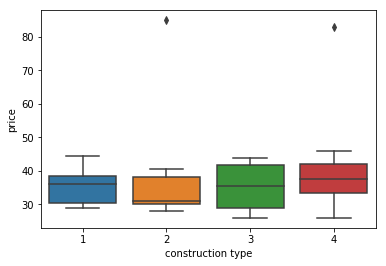

In [42]:
sns.boxplot(data=df, x='construction type', y='price')

### Barplot / countplot

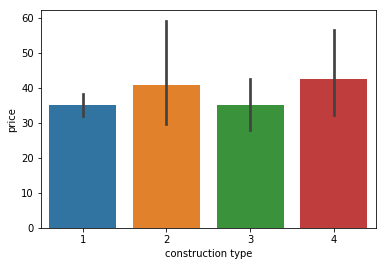

In [41]:
sns.barplot(data=df, x='construction type', y='price')

In [48]:
df.columns

Index(['local_prices', 'bathrroms', 'site_area', 'living_area', 'garage',
       'rooms', 'bedrooms', 'age', 'construction type', 'archicture',
       'fireplaces', 'price'],
      dtype='object')

### Pointplot

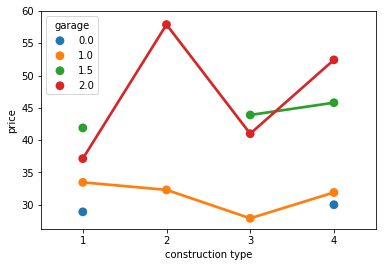

In [54]:
sns.pointplot(data=df, x='construction type', y='price', hue='garage', ci=10)

In [58]:
df

local_prices  bathrroms  site_area  living_area  garage  rooms  \
index                                                                   
1            4.9176        1.0     3.4720        0.998     1.0      7   
2            5.0208        1.0     3.5310        1.500     2.0      7   
3            4.5429        1.0     2.2750        1.175     1.0      6   
4            4.5573        1.0     4.0500        1.232     1.0      6   
5            5.0597        1.0     4.4550        1.121     1.0      6   
6            3.8910        1.0     4.4550        0.988     1.0      6   
7            5.8980        1.0     5.8500        1.240     1.0      7   
8            5.6039        1.0     9.5200        1.501     0.0      6   
9           16.4202        2.5     9.8000        3.420     2.0     10   
10          14.4598        2.5    12.8000        3.000     2.0      9   
11           5.8282        1.0     6.4350        1.225     2.0      6   
12           5.3003        1.0     4.9883        1.552     1.0      6   
13           6.2712        1.0     5.5200        0.975     1.0      5   
14           5.9592        1.0     6.6660        1.121     2.0      6   
15           5.0500        1.0     5.0000        1.020     0.0      5   
16           5.6039        1.0     9.5200        1.501     0.0      6   
17           8.2464        1.5     5.1500        1.664     2.0      8   
18           6.6969        1.5     6.9020        1.488     1.5      7   
19           7.7841        1.5     7.1020        1.376     1.0      6   
20           9.0384        1.0     7.8000        1.500     1.5      7   
21           5.9894        1.0     5.5200        1.256     2.0      6   
22           7.5422        1.5     4.0000        1.690     1.0      6   
23           8.7951        1.5     9.8900        1.820     2.0      8   
24           6.0931        1.5     6.7265        1.652     1.0      6   
25           8.3607        1.5     9.1500        1.777     2.0      8   
26           8.1400        1.0     8.0000        1.504     2.0      7   
27           9.1416        1.5     7.3262        1.831     1.5      8   
28          12.0000        1.5     5.0000        1.200     2.0      6   

       bedrooms  age  construction type  archicture  fireplaces  price  
index                                                                   
1             4   42                  3           1           0   25.9  
2             4   62                  1           1           0   29.5  
3             3   40                  2           1           0   27.9  
4             3   54                  4           1           0   25.9  
5             3   42                  3           1           0   29.9  
6             3   56                  2           1           0   29.9  
7             3   51                  2           1           1   30.9  
8             3   32                  1           1           0   28.9  
9             5   42                  2           1           1   84.9  
10            5   14                  4           1           1   82.9  
11            3   32                  1           1           0   35.9  
12            3   30                  1           2           0   31.5  
13            2   30                  1           2           0   31.0  
14            3   32                  2           1           0   30.9  
15            2   46                  4           1           1   30.0  
16            3   32                  1           1           0   28.9  
17            4   50                  4           1           0   36.9  
18            3   22                  1           1           1   41.9  
19            3   17                  2           1           0   40.5  
20            3   23                  3           3           0   43.9  
21            3   40                  4           1           1   37.5  
22            3   22                  1           1           0   37.9  
23            4   50                  1           1           1 

In [60]:
mean_prices=df.groupby(['bathrroms','bedrooms']).mean()['price']
mean_prices

bathrroms  bedrooms
1.0        2           30.500000
           3           32.223077
           4           27.700000
1.5        3           39.840000
           4           41.525000
2.5        5           83.900000
Name: price, dtype: float64

In [61]:
mean_prices.unstack()

bedrooms      2          3       4     5
bathrroms                               
1.0        30.5  32.223077  27.700   NaN
1.5         NaN  39.840000  41.525   NaN
2.5         NaN        NaN     NaN  83.9

### Heatmap

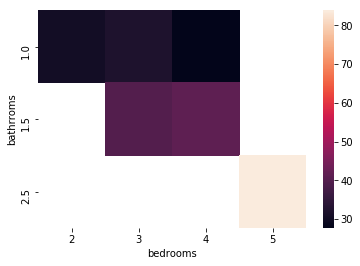

In [63]:
sns.heatmap(mean_prices.unstack());

In [64]:
df.corr()

local_prices  bathrroms  site_area  living_area    garage  \
local_prices           1.000000   0.881496   0.628046     0.840312  0.513695   
bathrroms              0.881496   1.000000   0.583495     0.894029  0.399777   
site_area              0.628046   0.583495   1.000000     0.680651  0.175567   
living_area            0.840312   0.894029   0.680651     1.000000  0.363548   
garage                 0.513695   0.399777   0.175567     0.363548  1.000000   
rooms                  0.750969   0.757478   0.564698     0.840513  0.566325   
bedrooms               0.652932   0.726375   0.459350     0.791281  0.539703   
age                   -0.342791  -0.200938  -0.382963    -0.177487 -0.057658   
construction type      0.145689   0.187706  -0.108468     0.055476  0.028662   
archicture             0.057270  -0.250035   0.089554    -0.063674  0.096213   
fireplaces             0.491864   0.481197   0.376435     0.371852  0.291581   
price                  0.923147   0.925081   0.666577     0.921651  0.461696   

                      rooms  bedrooms       age  construction type  \
local_prices       0.750969  0.652932 -0.342791           0.145689   
bathrroms          0.757478  0.726375 -0.200938           0.187706   
site_area          0.564698  0.459350 -0.382963          -0.108468   
living_area        0.840513  0.791281 -0.177487           0.055476   
garage             0.566325  0.539703 -0.057658           0.028662   
rooms              1.000000  0.924445  0.011342           0.084212   
bedrooms           0.924445  1.000000  0.106928           0.126131   
age                0.011342  0.106928  1.000000           0.168621   
construction type  0.084212  0.126131  0.168621           1.000000   
archicture        -0.060402 -0.248286 -0.499828          -0.184604   
fireplaces         0.396835  0.265366  0.090787           0.110257   
price              0.777145  0.700556 -0.299297           0.172716   

                   archicture  fireplaces     price  
local_prices         0.057270    0.491864  0.923147  
bathrroms           -0.250035    0.481197  0.925081  
site_area            0.089554    0.376435  0.666577  
living_area         -0.063674    0.371852  0.921651  
garage               0.096213    0.291581  0.461696  
rooms               -0.060402    0.396835  0.777145  
bedrooms            -0.248286    0.265366  0.700556  
age                 -0.499828    0.090787 -0.299297  
construction type   -0.184604    0.110257  0.172716  
archicture           1.000000   -0.264363 -0.022302  
fireplaces          -0.264363    1.000000  0.490053  
price               -0.022302    0.490053  1.000000

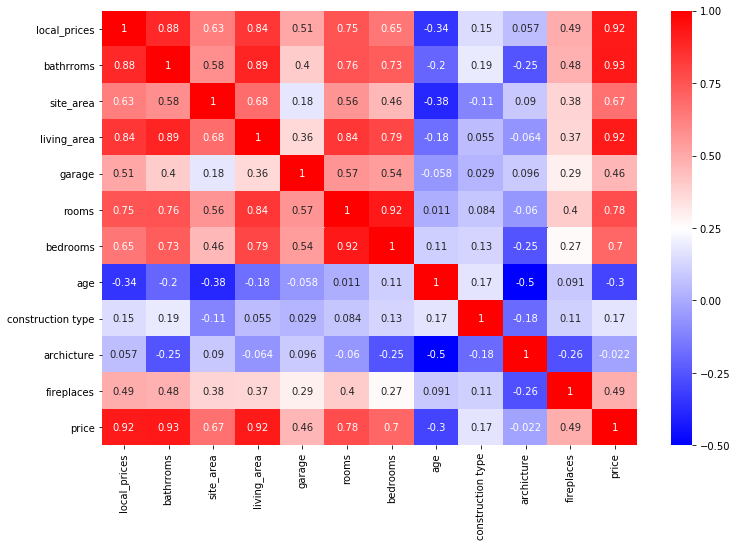

In [76]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.gcf().set_size_inches(12,8)

# from matplotlib import cm
# cmap=cm.get_cmap('bwr')
# cmap.set_over()

### Clustermap

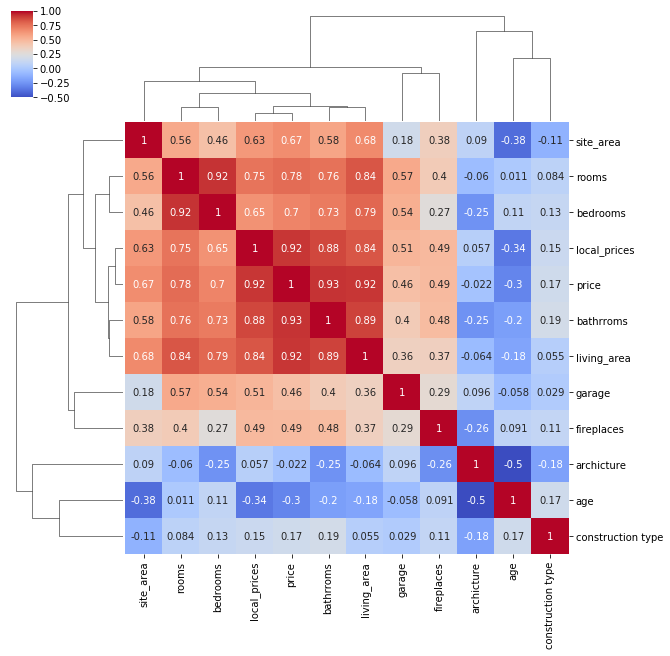

In [77]:
sns.clustermap(df.corr(), annot=True, cmap='coolwarm')

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

## Other types

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)